In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uci-turkiye-student-evaluation-data-set/turkiye-student-evaluation_generic.csv


In [61]:
train=pd.read_csv("/kaggle/input/uci-turkiye-student-evaluation-data-set/turkiye-student-evaluation_generic.csv")

In [39]:
train.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# DATA VISULIZATION

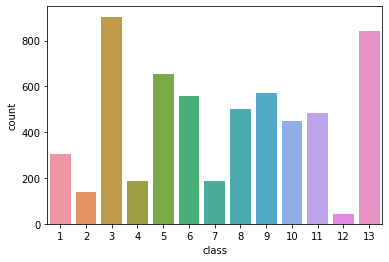

In [40]:
sns.countplot(x="class",data=train)

Number of course taken by Student(course No. 3 is student favourite,Course No. 12 is mostly disliked by them)

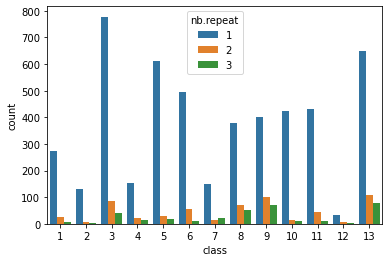

In [41]:
sns.countplot(x="class",hue="nb.repeat",data=train)

Course no. 13 is mostly repeated by students

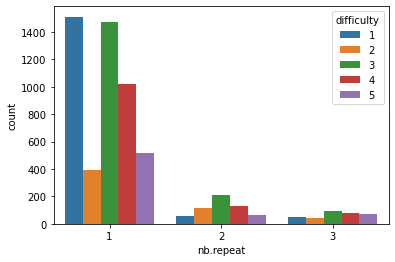

In [42]:
sns.countplot(x="nb.repeat",hue="difficulty",data=train)

Easy courses are also repeated by students

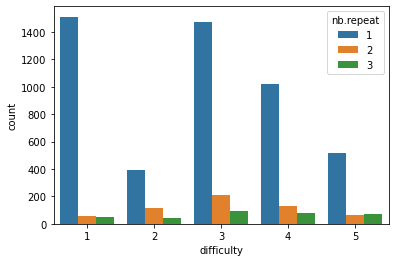

In [43]:
sns.countplot(x="difficulty",hue="nb.repeat",data=train)

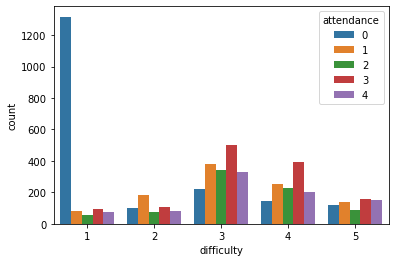

In [44]:
sns.countplot(x="difficulty",hue="attendance",data=train)

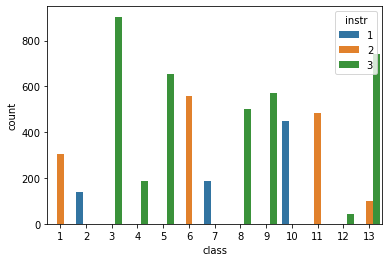

In [45]:
sns.countplot(x="class",hue="instr",data=train)

Instructor1:Course No.-2,7,10 Instructor2:Course No.-1,6,11,13 Instructor3:Course No.-3,4,5,8,9,12,13 Course No. 13 is jointly taken by Intructor1,Instructor2 Instructor1 is least popular May be

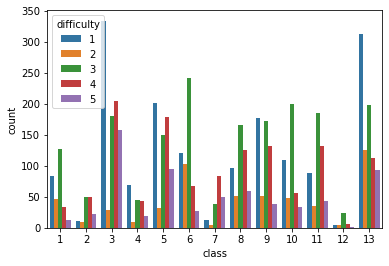

In [46]:
sns.countplot(x="class",hue="difficulty",data=train)

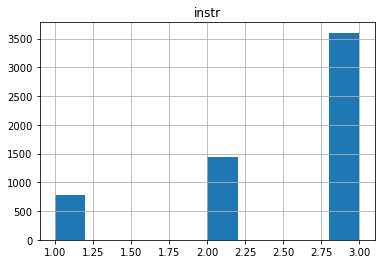

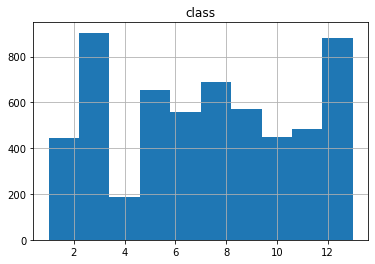

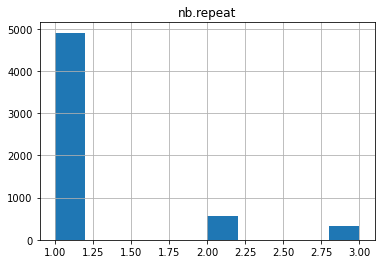

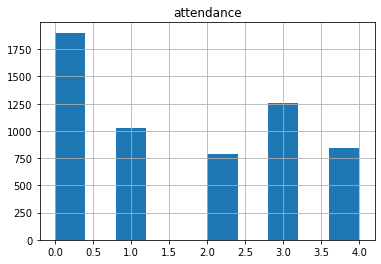

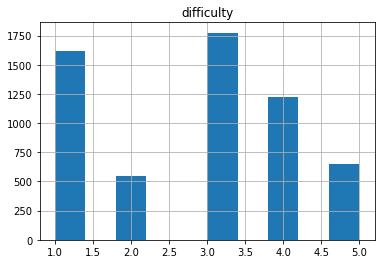

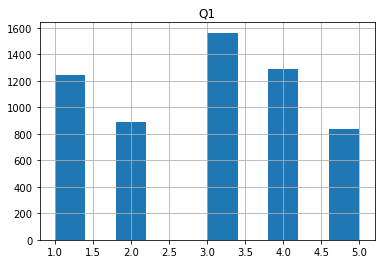

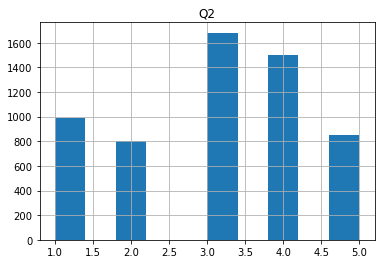

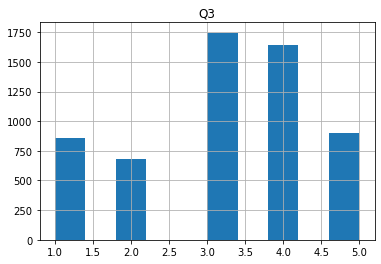

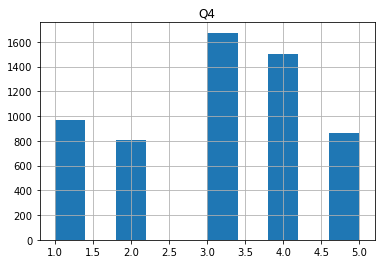

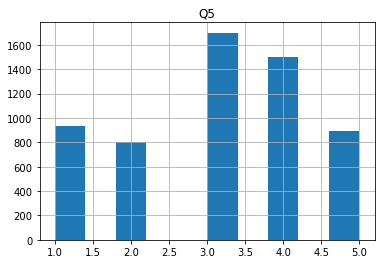

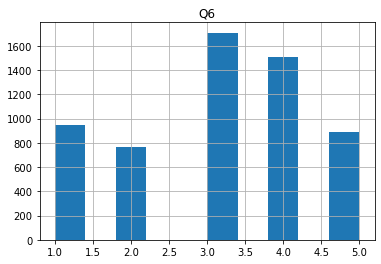

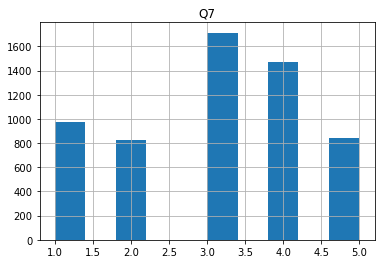

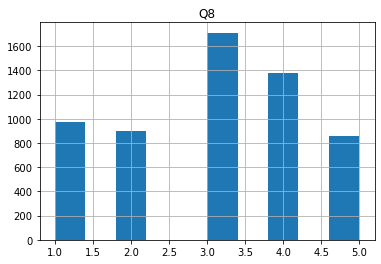

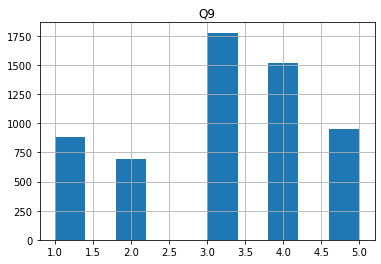

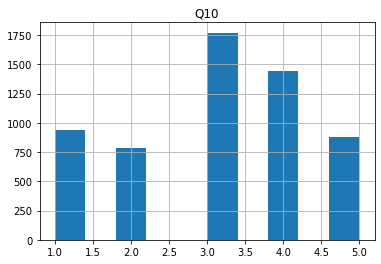

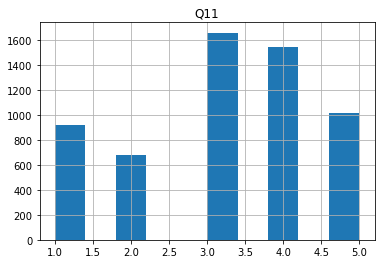

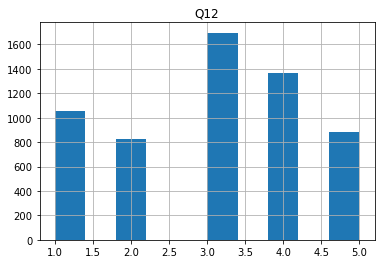

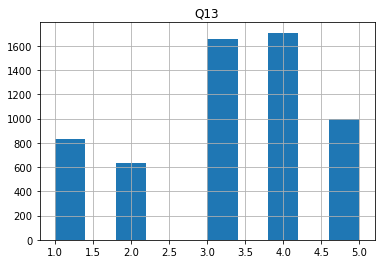

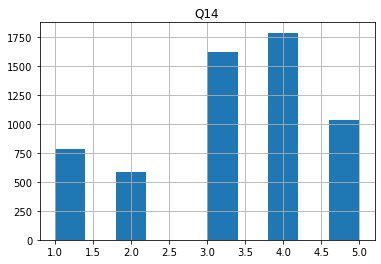

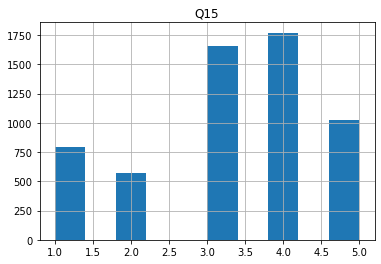

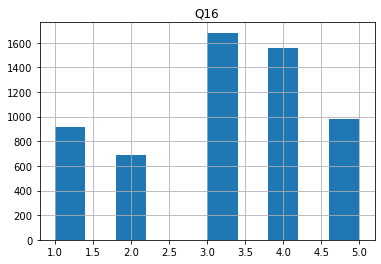

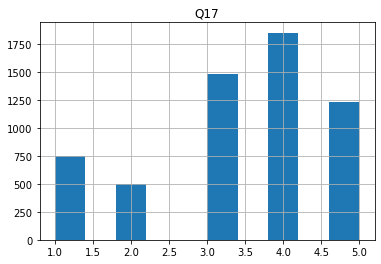

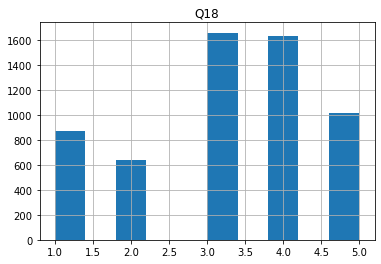

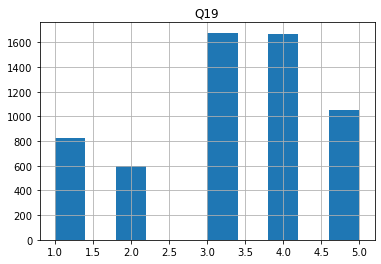

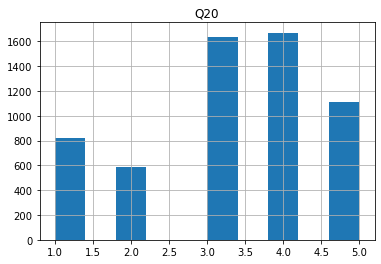

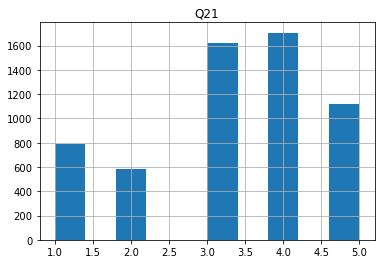

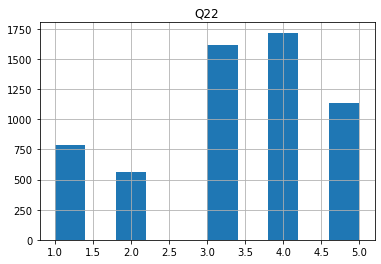

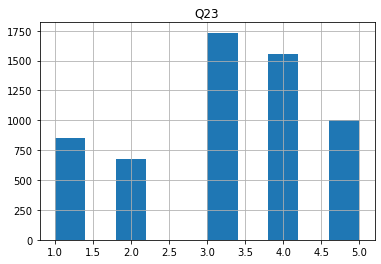

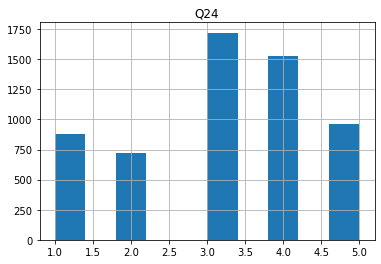

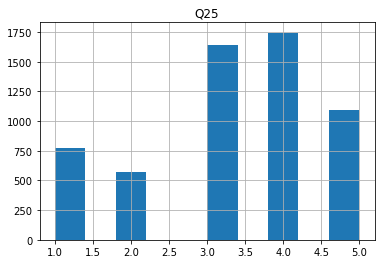

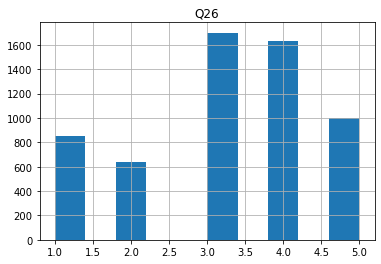

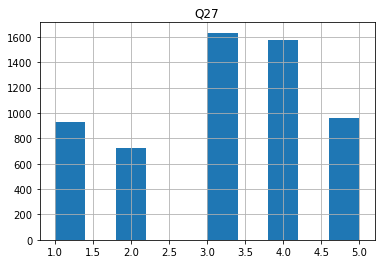

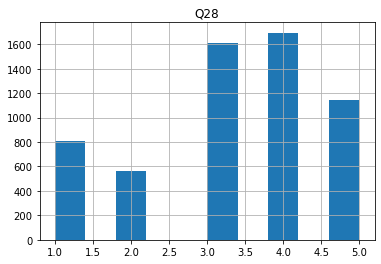

In [47]:
for i in train.columns:
    train.hist(i)
    plt.show()

# DATA PREPROCESSING

In [48]:
X_res=train.values

In [49]:
X_res

array([[ 1,  2,  1, ...,  3,  3,  3],
       [ 1,  2,  1, ...,  3,  3,  3],
       [ 1,  2,  1, ...,  5,  5,  5],
       ...,
       [ 3, 13,  1, ...,  5,  5,  5],
       [ 3, 13,  1, ...,  1,  1,  1],
       [ 3, 13,  1, ...,  1,  1,  1]])

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features=scaler.fit_transform(X_res)

In [51]:
features

array([[-2.06785045, -1.43071903, -0.40217401, ..., -0.17485237,
        -0.11984497, -0.24094785],
       [-2.06785045, -1.43071903, -0.40217401, ..., -0.17485237,
        -0.11984497, -0.24094785],
       [-2.06785045, -1.43071903, -0.40217401, ...,  1.39922464,
         1.42842963,  1.32326465],
       ...,
       [ 0.71607035,  1.55204221, -0.40217401, ...,  1.39922464,
         1.42842963,  1.32326465],
       [ 0.71607035,  1.55204221, -0.40217401, ..., -1.74892938,
        -1.66811957, -1.80516036],
       [ 0.71607035,  1.55204221, -0.40217401, ..., -1.74892938,
        -1.66811957, -1.80516036]])

# CLUSTERING

In [52]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(features)

In [53]:
kmeans.labels_

array([0, 0, 4, ..., 4, 2, 2], dtype=int32)

In [54]:
kmeans.inertia_

60429.555103093415

Lets find suitable value for k using elbow method and silhoutte score

In [55]:
m=[]
for k in range(1,80):
    km=KMeans(n_clusters=k, random_state=42).fit(features)
    m.append(km.inertia_)


In [56]:
m

[192060.00000000122,
 105150.16829644423,
 73956.57647075693,
 65555.52884277218,
 60429.555103093415,
 57626.87514187647,
 55905.04030284824,
 54789.213702033056,
 53152.48140470684,
 52038.5964611984,
 50784.04681974376,
 49664.98856520943,
 48775.26676356244,
 48200.79433499651,
 47186.28516296363,
 46226.95006697017,
 45704.142898483915,
 44819.605628034275,
 44309.163954862604,
 43728.686219023904,
 43139.1330833253,
 42689.75489970243,
 42125.9378404713,
 41686.478458369136,
 41457.312791555705,
 41007.86438229737,
 40607.42561000816,
 40171.030508582015,
 39877.231167917555,
 39550.05917041998,
 39368.26200293803,
 39048.77482021158,
 38789.34462127608,
 38537.210874463926,
 38492.496494364146,
 38078.44073658027,
 37909.854037556055,
 37617.00415439246,
 37439.65356104596,
 37305.05172304525,
 37098.10258936598,
 36995.02529097919,
 36719.715451282405,
 36486.98542195587,
 36188.45424196404,
 36149.40028232273,
 35914.57968653303,
 35793.115959508825,
 35694.22691768532,
 35565

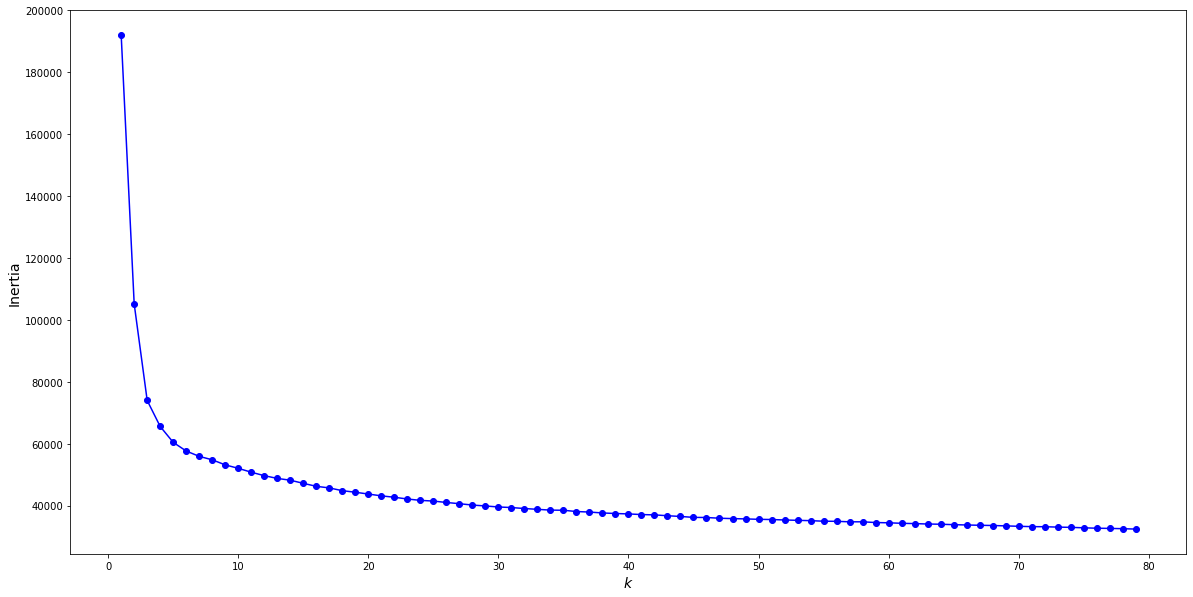

In [57]:
plt.figure(figsize=(20,10))
plt.plot(range(1, 80),m, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

value of k will be between 0 to 10

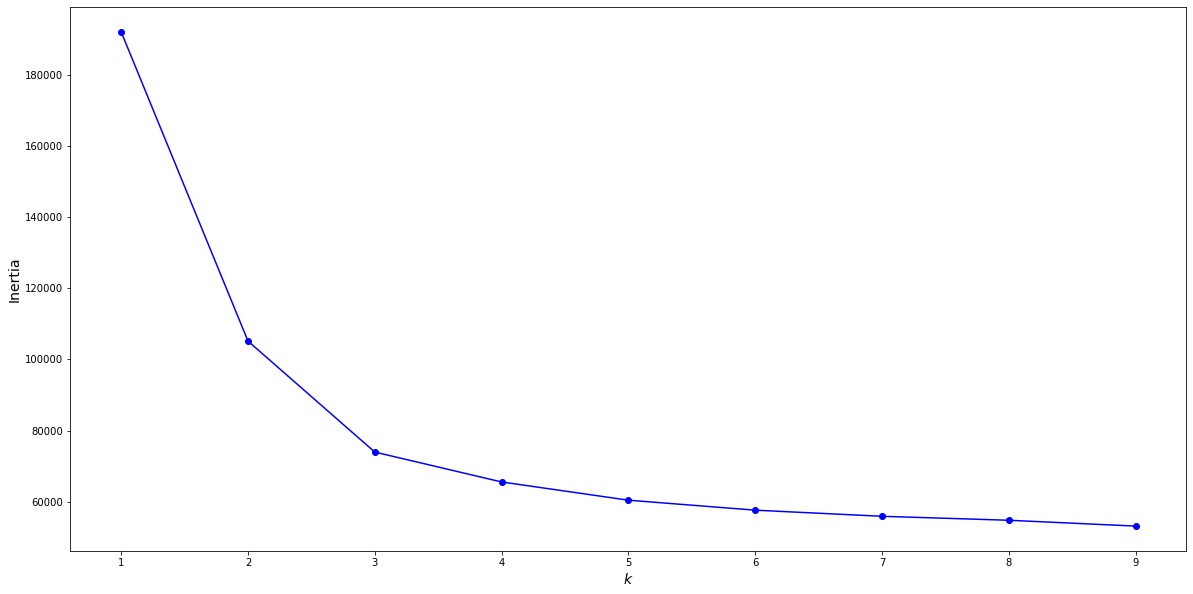

In [58]:
l=[]
p=[]
for k in range(1,10):
    km=KMeans(n_clusters=k, random_state=42).fit(features)
    l.append(km.inertia_)
    p.append(km)
plt.figure(figsize=(20,10))
plt.plot(range(1, 10),l, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

value of k  may be 3 lets cross check using silhoutte score (l stores model inertia,p stores all model

In [59]:
from sklearn.metrics import silhouette_score
silhouette_scores =[]
for model in p[1:]:
    s=silhouette_score(features, model.labels_)
    silhouette_scores.append(s)
    

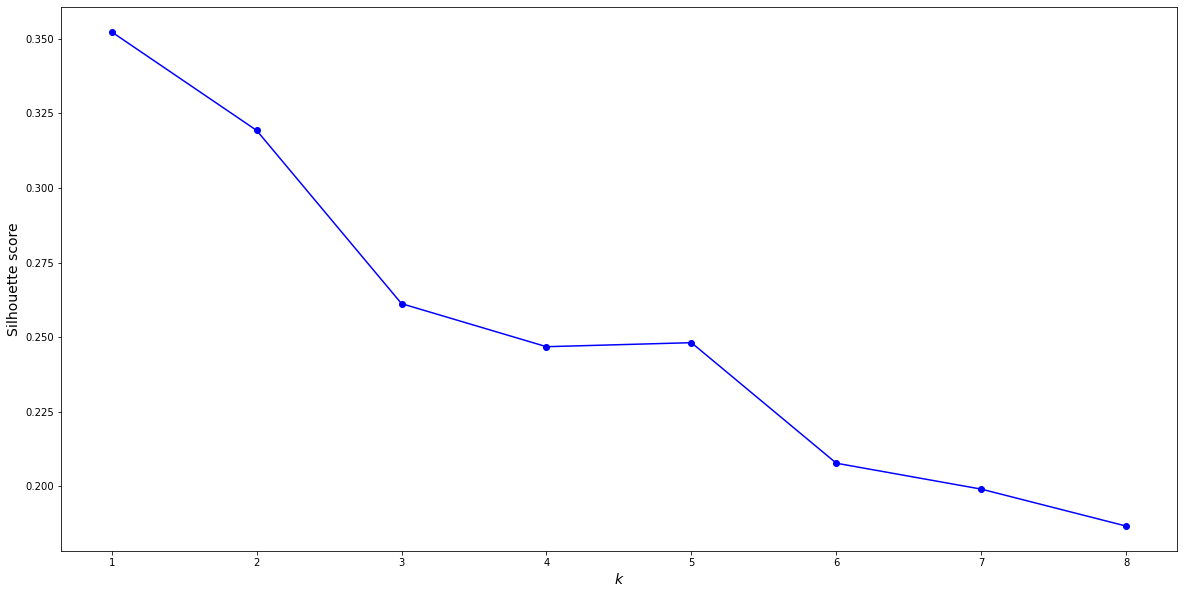

In [60]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 9),silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()



Silhoutte curve is not as we want(their might be some error)

# May be we should try reducing dimensions before clustering 

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)


In [63]:
f=pca.fit_transform(features)

In [64]:
f

array([[ 0.74231262, -0.10972028],
       [ 0.72750008, -0.14714608],
       [-7.58649782,  0.36422966],
       ...,
       [-7.43229258, -0.79495906],
       [ 9.11140595, -0.56513996],
       [ 9.11140595, -0.56513996]])

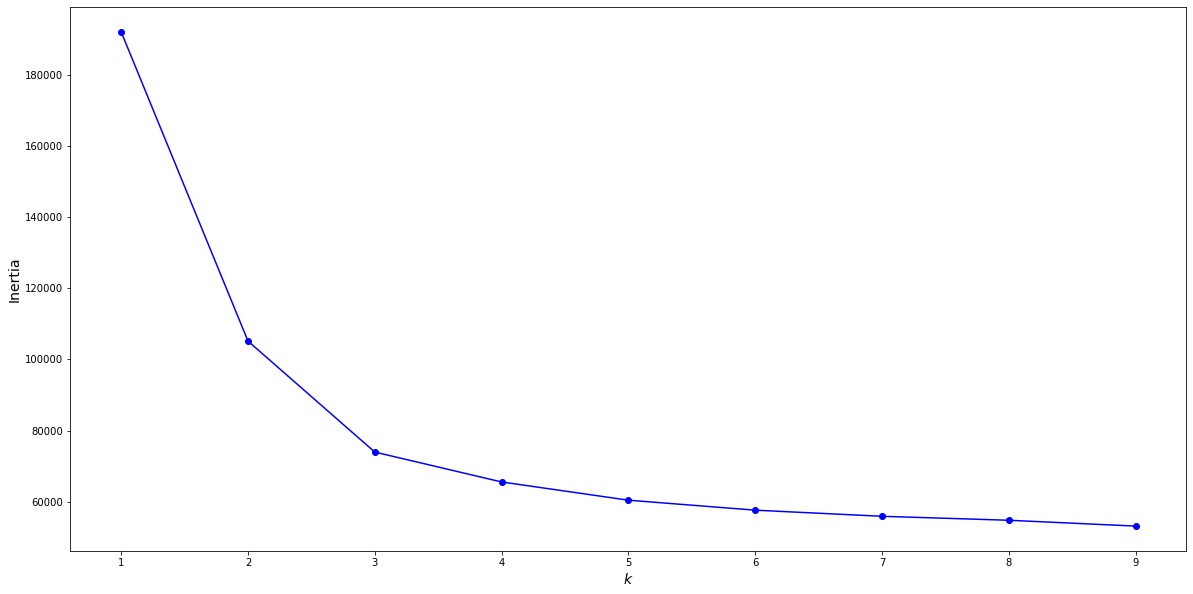

In [65]:
l=[]
p=[]
for k in range(1,10):
    km=KMeans(n_clusters=k, random_state=42).fit(features)
    l.append(km.inertia_)
    p.append(km)
plt.figure(figsize=(20,10))
plt.plot(range(1, 10),l, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Elbow method again giving value of k to be 3 or 4

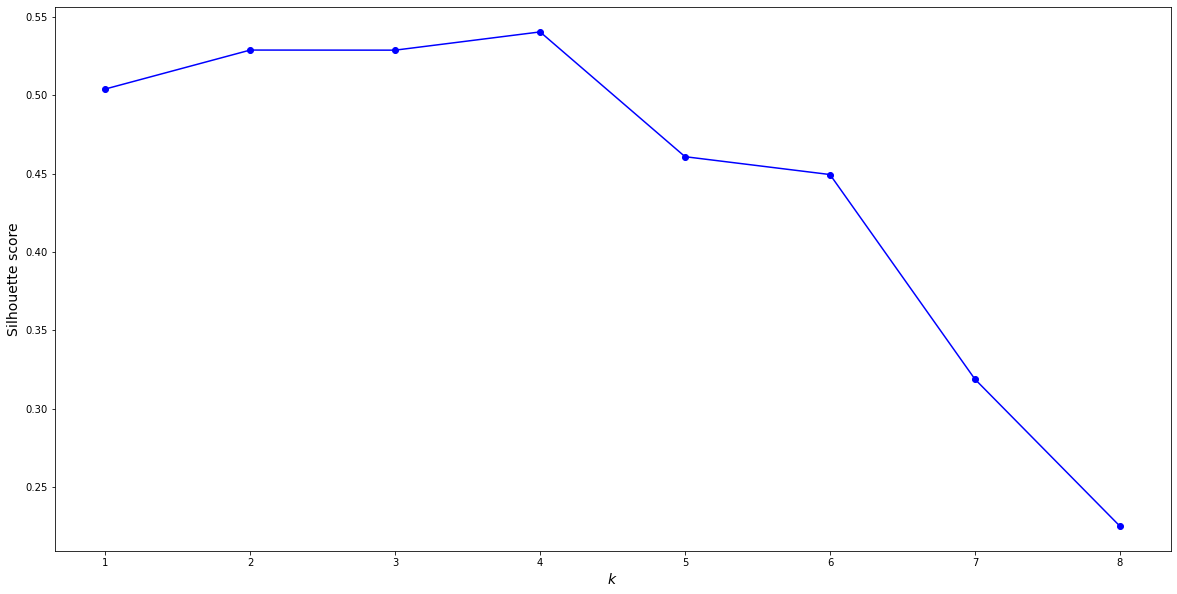

In [66]:
silhouette_scores =[]
for model in p[1:]:
    s=silhouette_score(f, model.labels_)
    silhouette_scores.append(s)
plt.figure(figsize=(20, 10))
plt.plot(range(1, 9),silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()  

k=4 is the best value for number of cluster(Elbow method is giving k=3,4 silhoutte scores is giving k=4 so intersection will be k=4)

Clustering after PCA in this case produce better silhoutte scores graph

In [67]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(f)

In [68]:
t=kmeans.labels_

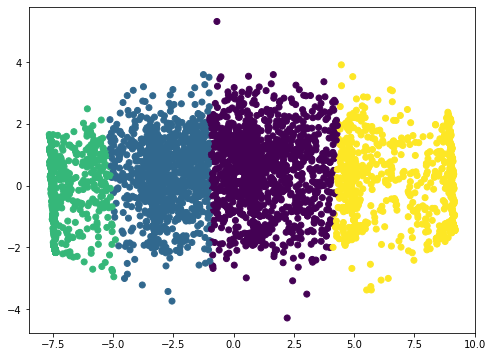

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(f[:,0], f[:,1], c=kmeans.labels_.astype(float))
plt.show()

# CLASSIFICATION ALGORITHM(MULTICLASS CLASSIFICATION)

# RANDOM FOREST CLASSIFIER IS THE BEST ALGORITHM TO SOLVE MULTICLASS CLASSIFICATION PROBLEMS

In [71]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

x_train,x_test,y_train,y_test = train_test_split(f,t, train_size=0.80, random_state=42)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=8, random_state=42)
cv_scores = cross_val_score(rnd_clf, x_train, y_train, cv=10)
cv_scores.mean()

0.9967783469472519

In [75]:
rnd_clf.fit(x_train,y_train)
rnd_clf.score(x_test,y_test)

0.9974226804123711

we are getting 99% accuracy

Lets try various n_estimators and max_leaf_nodes value

In [76]:
n_estimator=[10,100,400,500,600,700,800,2000]
max_leaf_nodes=[2,4,6,8,16]
for i in n_estimator:
    for k in max_leaf_nodes:
       rnd_clf = RandomForestClassifier(n_estimators=i, max_leaf_nodes=k, random_state=42)
       rnd_clf.fit(x_train, y_train)
       t=rnd_clf.score(x_test,y_test)
       print(i,k,t)
    print("-"*40)

10 2 0.6323024054982818
10 4 0.9957044673539519
10 6 0.9957044673539519
10 8 0.9974226804123711
10 16 0.9974226804123711
----------------------------------------
100 2 0.6486254295532646
100 4 0.9974226804123711
100 6 0.9982817869415808
100 8 0.9974226804123711
100 16 0.9974226804123711
----------------------------------------
400 2 0.6486254295532646
400 4 0.993127147766323
400 6 0.9982817869415808
400 8 0.9974226804123711
400 16 0.9974226804123711
----------------------------------------
500 2 0.6486254295532646
500 4 0.993127147766323
500 6 0.9982817869415808
500 8 0.9974226804123711
500 16 0.9974226804123711
----------------------------------------
600 2 0.6503436426116839
600 4 0.993127147766323
600 6 0.9982817869415808
600 8 0.9982817869415808
600 16 0.9974226804123711
----------------------------------------
700 2 0.6503436426116839
700 4 0.993127147766323
700 6 0.9982817869415808
700 8 0.9982817869415808
700 16 0.9974226804123711
----------------------------------------
800 2 0

Our Random Forest Classifier is giving as 99% accuracy (min hyperparameter value for best score n_estimator=500,max_leaf_nodes=6)